In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
DATASET_DIRECTORY = 'Dataset/'
DATASET_DIRECTORY_CORN = 'Dataset/Corn/'
DATASET_DIRECTORY_POTATO = 'Dataset/Potato/'
DATASET_DIRECTORY_RICE = 'Dataset/Rice/'
DATASET_DIRECTORY_WHEAT = 'Dataset/Wheat/'

In [3]:
CLASS_NAMES = []
CLASS_NAMES_CORN = []
CLASS_NAMES_POTATO = []
CLASS_NAMES_RICE = []
CLASS_NAMES_WHEAT = []

In [4]:
NUM_CLASSES = 0
NUM_CLASSES_CORN = 0
NUM_CLASSES_POTATO = 0
NUM_CLASSES_RICE = 0
NUM_CLASSES_WHEAT = 0

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 1e-4
EPOCHS = 32

In [6]:
#NUMBER OF CLASSES AND CLASS NAMES IN DATASET FOLDER
if len(CLASS_NAMES) == 0:
    for directory in sorted(os.listdir(DATASET_DIRECTORY)):
        CLASS_NAMES.append(directory)

NUM_CLASSES = len(CLASS_NAMES)
NUM_CLASSES, CLASS_NAMES

(4, ['Corn', 'Potato', 'Rice', 'Wheat'])

In [7]:
#NUMBER OF CLASSES AND CLASS NAMES IN DATASET/CORN/ FOLDER
if len(CLASS_NAMES_CORN) == 0:
    for directory in sorted(os.listdir(DATASET_DIRECTORY_CORN)):
        CLASS_NAMES_CORN.append(directory)

NUM_CLASSES_CORN = len(CLASS_NAMES_CORN)
NUM_CLASSES_CORN, CLASS_NAMES_CORN

(4,
 ['Corn Common Rust',
  'Corn Gray Leaf Spot',
  'Corn Healthy',
  'Corn Leaf Blight'])

In [8]:
#NUMBER OF CLASSES AND CLASS NAMES IN DATASET/POTATO/ FOLDER
if len(CLASS_NAMES_POTATO) == 0:
    for directory in sorted(os.listdir(DATASET_DIRECTORY_POTATO)):
        CLASS_NAMES_POTATO.append(directory)

NUM_CLASSES_POTATO = len(CLASS_NAMES_POTATO)
NUM_CLASSES_POTATO, CLASS_NAMES_POTATO

(3, ['Potato Early Blight', 'Potato Healthy', 'Potato Late Blight'])

In [9]:
#NUMBER OF CLASSES AND CLASS NAMES IN DATASET/RICE/ FOLDER
if len(CLASS_NAMES_RICE) == 0:
    for directory in sorted(os.listdir(DATASET_DIRECTORY_RICE)):
        CLASS_NAMES_RICE.append(directory)

NUM_CLASSES_RICE = len(CLASS_NAMES_RICE)
NUM_CLASSES_RICE, CLASS_NAMES_RICE

(4, ['Rice Brown Spot', 'Rice Healthy', 'Rice Hispa', 'Rice Leaf Blast'])

In [10]:
#NUMBER OF CLASSES AND CLASS NAMES IN DATASET/wHEAT/ FOLDER
if len(CLASS_NAMES_WHEAT) == 0:
    for directory in sorted(os.listdir(DATASET_DIRECTORY_WHEAT)):
        CLASS_NAMES_WHEAT.append(directory)

NUM_CLASSES_WHEAT = len(CLASS_NAMES_WHEAT)
NUM_CLASSES_WHEAT, CLASS_NAMES_WHEAT

(3, ['Wheat Brown Rust', 'Wheat Healthy', 'Wheat Yellow Rust'])

In [11]:
#SPLITTING CORN DATASET INTO TRAINING AND VALIDATION SETS
train_ds_corn, val_ds_corn = tf.keras.utils.image_dataset_from_directory(
    directory = DATASET_DIRECTORY_CORN,
    label_mode = 'categorical',
    class_names = CLASS_NAMES_CORN,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    validation_split = VALIDATION_SPLIT,
    subset = 'both',
    seed = 1
)

train_ds_corn = train_ds_corn.cache().prefetch(tf.data.AUTOTUNE)
val_ds_corn = val_ds_corn.cache().prefetch(tf.data.AUTOTUNE)

Found 14632 files belonging to 4 classes.
Using 11706 files for training.
Using 2926 files for validation.


In [12]:
#SPLITTING POTATO DATASET INTO TRAINING AND VALIDATION SETS
train_ds_potato, val_ds_potato = tf.keras.utils.image_dataset_from_directory(
    directory = DATASET_DIRECTORY_POTATO,
    label_mode = 'categorical',
    class_names = CLASS_NAMES_POTATO,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    validation_split = VALIDATION_SPLIT,
    subset = 'both',
    seed = 1
)

train_ds_potato = train_ds_potato.cache().prefetch(tf.data.AUTOTUNE)
val_ds_potato = val_ds_potato.cache().prefetch(tf.data.AUTOTUNE)

Found 8286 files belonging to 3 classes.
Using 6629 files for training.
Using 1657 files for validation.


In [13]:
#SPLITTING RICE DATASET INTO TRAINING AND VALIDATION SETS
train_ds_rice, val_ds_rice = tf.keras.utils.image_dataset_from_directory(
    directory = DATASET_DIRECTORY_RICE,
    label_mode = 'categorical',
    class_names = CLASS_NAMES_RICE,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    validation_split = VALIDATION_SPLIT,
    subset = 'both',
    seed = 1
)

train_ds_rice = train_ds_rice.cache().prefetch(tf.data.AUTOTUNE)
val_ds_rice = val_ds_rice.cache().prefetch(tf.data.AUTOTUNE)

Found 2791 files belonging to 4 classes.
Using 2233 files for training.
Using 558 files for validation.


In [14]:
#SPLITTING WHEAT DATASET INTO TRAINING AND VALIDATION SETS
train_ds_wheat, val_ds_wheat = tf.keras.utils.image_dataset_from_directory(
    directory = DATASET_DIRECTORY_WHEAT,
    label_mode = 'categorical',
    class_names = CLASS_NAMES_WHEAT,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    validation_split = VALIDATION_SPLIT,
    subset = 'both',
    seed = 1
)

train_ds_wheat = train_ds_wheat.cache().prefetch(tf.data.AUTOTUNE)
val_ds_wheat = val_ds_wheat.cache().prefetch(tf.data.AUTOTUNE)

Found 3781 files belonging to 3 classes.
Using 3025 files for training.
Using 756 files for validation.


In [15]:
def preprocess(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

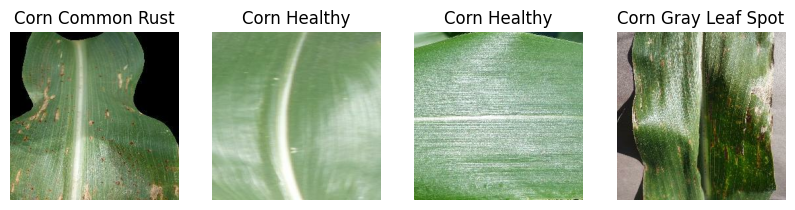

In [16]:
for images_c, labels_c in train_ds_corn.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images_c[i] / 255.0)
        plt.title(CLASS_NAMES_CORN[np.argmax(labels_c[i])])
        plt.axis('off')
        

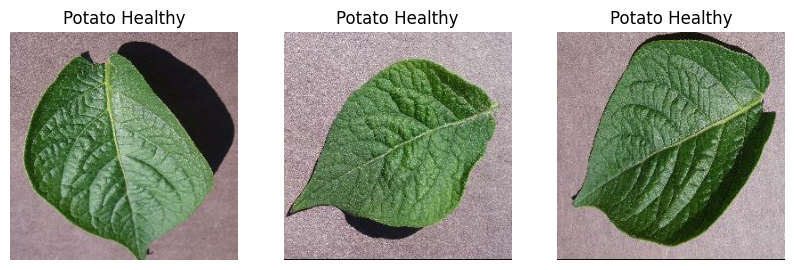

In [17]:
for images_p, labels_p in train_ds_potato.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images_p[i] / 255.0)
        plt.title(CLASS_NAMES_POTATO[np.argmax(labels_p[i])])
        plt.axis('off')        

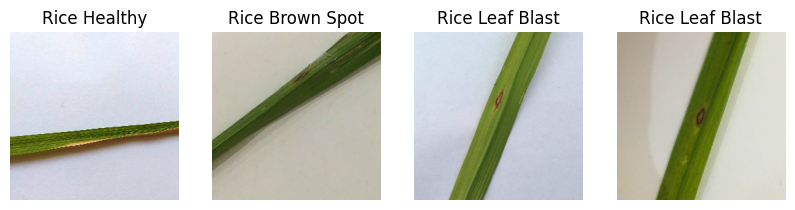

In [18]:
for images_r, labels_r in train_ds_rice.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images_r[i] / 255.0)
        plt.title(CLASS_NAMES_RICE[np.argmax(labels_r[i])])
        plt.axis('off')        

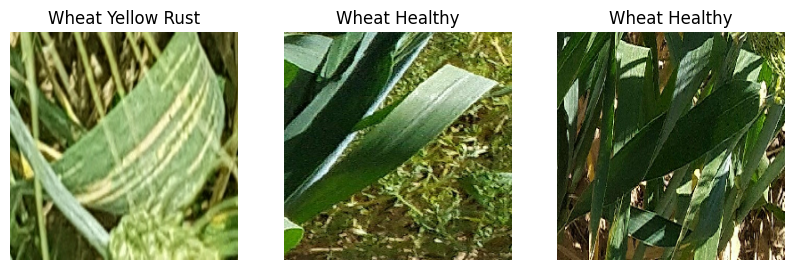

In [19]:
for images_w, labels_w in train_ds_wheat.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images_w[i] / 255.0)
        plt.title(CLASS_NAMES_WHEAT[np.argmax(labels_w[i])])
        plt.axis('off')        

In [20]:

def create_model(NUM_CLASSES):
 
  model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='input'),
    
     tf.keras.Sequential([
        tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, name='resizing'),
        tf.keras.layers.Rescaling(1./255, name='rescaling')
    ], name='preprocessing'),
    
     tf.keras.Sequential([
        tf.keras.layers.RandomFlip(name='random_flip'),
        tf.keras.layers.RandomRotation(0.2, name='random_rotation'),
     ], name='augmentation'),
    
     tf.keras.layers.Conv2D(32, (3, 3), name='conv2d_1'),
     tf.keras.layers.Activation('relu', name='activation_1'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_1'),
     tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling_2d_1'),
    
     tf.keras.layers.Conv2D(64, (3, 3), name='conv2d_2'),
     tf.keras.layers.Activation('relu', name='activation_2'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_2'),
     tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling_2d_2'),
    
     tf.keras.layers.Conv2D(64, (3, 3), name='conv2d_3'),
     tf.keras.layers.Activation('relu', name='activation_3'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_3'),
     tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling_2d_3'),
    
     tf.keras.layers.Conv2D(64, (3, 3), name='conv2d_4'),
     tf.keras.layers.Activation('relu', name='activation_4'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_4'),
     tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling_2d_4'),
    
     tf.keras.layers.Conv2D(64, (3, 3), name='conv2d_5'),
     tf.keras.layers.Activation('relu', name='activation_5'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_5'),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='max_pooling_2d_5'),
    
     tf.keras.layers.Conv2D(64, (3, 3), name='conv2d_6'),
     tf.keras.layers.Activation('relu', name='activation_6'),
     tf.keras.layers.BatchNormalization(name='batch_normalization_6'),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='max_pooling_2d_6'),
    
     tf.keras.layers.Flatten(),
    
     tf.keras.layers.Dense(64, name='dense_1'),
     tf.keras.layers.Activation('relu', name='activation_7'),
     tf.keras.layers.Dropout(0.5, name='dropout'),
    
     tf.keras.layers.Dense(NUM_CLASSES, name='dense_2'),
     tf.keras.layers.Activation('softmax', name='activation_8')
    ], name='agrocare')
    
  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
  
  return model    

In [21]:
model=create_model(NUM_CLASSES)
model.summary()

Model: "agrocare"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ preprocessing (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d_1 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d_2 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d_3 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d_4 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_2d_5 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 185,220 (723.52 KB)

 Trainable params: 184,516 (720.77 KB)

 Non-trainable params: 704 (2.75 KB)

In [22]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Checkpoints\checkpoints.weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\srima\AppData\Local\Temp\ipykernel_36496\2923439115.py:2: SyntaxWarning: invalid escape sequence '\c'
  filepath='Checkpoints\checkpoints.weights.h5',


In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

In [24]:
model_corn = create_model(NUM_CLASSES_CORN)
history_corn = model_corn.fit(train_ds_corn, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_ds_corn, callbacks=[model_checkpoint_callback, early_stopping])

Epoch 1/32


KeyboardInterrupt: 

In [68]:
model_corn.save('saved_models/model_corn.keras')

In [25]:
model_potato = create_model(NUM_CLASSES_POTATO)
history_potato = model_potato.fit(train_ds_potato, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_ds_potato, callbacks=[model_checkpoint_callback, early_stopping])

Epoch 1/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.6684 - loss: 0.9320 - val_accuracy: 0.3838 - val_loss: 1.5242
Epoch 2/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.8961 - loss: 0.2643 - val_accuracy: 0.4363 - val_loss: 1.7132
Epoch 3/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.9355 - loss: 0.1823 - val_accuracy: 0.9258 - val_loss: 0.1869
Epoch 4/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.9556 - loss: 0.1339 - val_accuracy: 0.8558 - val_loss: 0.4935
Epoch 5/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.9626 - loss: 0.1082 - val_accuracy: 0.8328 - val_loss: 0.6222
Epoch 6/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.9669 - loss: 0.0890 - val_accuracy: 0.8491 - val_loss: 0.5238
Epoch 7/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 515s 2s/step - accuracy: 0.9777 - loss: 0.0670 - val_accuracy: 0.8280 - val_loss: 0.7295
Epoch 8/32
208/208 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.9820 - loss: 0.0554 - val_accu

In [26]:
model_potato.save('saved_models\model_potato.keras')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\srima\AppData\Local\Temp\ipykernel_18500\1300899384.py:1: SyntaxWarning: invalid escape sequence '\m'
  model_potato.save('saved_models\model_potato.keras')


In [25]:
def rice_model(NUM_CLASSES):
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
        include_top=False,
        weights='imagenet'  # You can also set this to None if you want to train from scratch
    )
    base_model.trainable = False  # Freeze the base model layers

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='input'),
        
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='output')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    
    return model

In [26]:
model_rice = rice_model(NUM_CLASSES_RICE)
history_rice = model_rice.fit(train_ds_rice, batch_size=BATCH_SIZE, epochs=50, validation_data=val_ds_rice, callbacks=[model_checkpoint_callback])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.2667 - loss: 1.4935 - val_accuracy: 0.4014 - val_loss: 1.3311
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.3849 - loss: 1.3849 - val_accuracy: 0.4265 - val_loss: 1.2404
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.4202 - loss: 1.2957 - val_accuracy: 0.4498 - val_loss: 1.1758
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4477 - loss: 1.2471 - val_accuracy: 0.5090 - val_loss: 1.1284
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4667 - loss: 1.1973 - val_accuracy: 0.5233 - val_loss: 1.0932
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4770 - loss: 1.1607 - val_accuracy: 0.5412 - val_loss: 1.0647
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4866 - loss: 1.1537 - val_accuracy: 0.5502 - val_loss: 1.0428
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.52

In [32]:
model_rice.save('saved_models\model_rice.keras')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\srima\AppData\Local\Temp\ipykernel_18500\2489361610.py:1: SyntaxWarning: invalid escape sequence '\m'
  model_rice.save('saved_models\model_rice.keras')


In [29]:
model_wheat = create_model(NUM_CLASSES_WHEAT)
history_wheat = model_wheat.fit(train_ds_wheat, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_ds_wheat, callbacks=[model_checkpoint_callback])

Epoch 1/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.5149 - loss: 1.5628 - val_accuracy: 0.3135 - val_loss: 1.7559
Epoch 2/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.8198 - loss: 0.4718 - val_accuracy: 0.3135 - val_loss: 2.9305
Epoch 3/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8901 - loss: 0.3163 - val_accuracy: 0.3135 - val_loss: 3.2333
Epoch 4/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.9051 - loss: 0.2537 - val_accuracy: 0.3386 - val_loss: 2.0141
Epoch 5/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9379 - loss: 0.1764 - val_accuracy: 0.8148 - val_loss: 0.4668
Epoch 6/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9427 - loss: 0.1753 - val_accuracy: 0.9233 - val_loss: 0.1807
Epoch 7/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.9533 - loss: 0.1404 - val_accuracy: 0.9683 - val_loss: 0.1001
Epoch 8/32
95/95 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9602 - loss: 0.1317 - val_accuracy: 0.9643 - v

In [30]:
model_wheat.save('saved_models\model_wheat.keras')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\srima\AppData\Local\Temp\ipykernel_18500\2006954089.py:1: SyntaxWarning: invalid escape sequence '\m'
  model_wheat.save('saved_models\model_wheat.keras')


In [ ]:
predictions = model_corn.predict(val_ds_corn, verbose=1)
predictions

92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 388ms/step


array([[9.9995291e-01, 4.7041260e-05, 8.4776350e-14, 6.7994665e-11],
       [1.0000000e+00, 6.2703058e-11, 4.9597550e-23, 4.6986466e-17],
       [6.2398408e-07, 2.2553847e-06, 9.9997401e-01, 2.3106291e-05],
       ...,
       [8.3566163e-05, 1.5561147e-02, 1.7455994e-04, 9.8418069e-01],
       [9.9999988e-01, 9.4458954e-08, 1.4394131e-14, 1.1198914e-11],
       [6.6011688e-07, 1.0715469e-04, 1.5005718e-05, 9.9987721e-01]],
      dtype=float32)

In [ ]:
predictions.shape

(2926, 4)

In [ ]:
CLASS_NAMES_CORN[np.argmax(predictions[0])]

'Corn Common Rust'

(-0.5, 255.5, 255.5, -0.5)

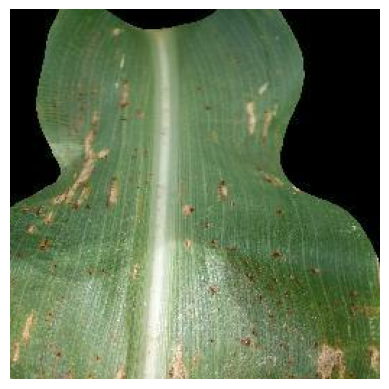

In [ ]:
plt.imshow(images_c[0] / 255.0)
plt.axis('off')